<a href="https://colab.research.google.com/github/LogicalGuy77/URL_Classifier/blob/main/URL_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df=pd.read_csv('phishing_website_dataset.csv')
df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188632,179093.txt,https://www.life-in-ecuador.com,30,www.life-in-ecuador.com,23,0,com,100.000000,0.533333,0.522907,...,0,0,1,43,1,16,42,0,44,1
188633,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
188634,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
188635,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188637 entries, 0 to 188636
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    188637 non-null  object 
 1   URL                         188637 non-null  object 
 2   URLLength                   188637 non-null  int64  
 3   Domain                      188637 non-null  object 
 4   DomainLength                188637 non-null  int64  
 5   IsDomainIP                  188637 non-null  int64  
 6   TLD                         188637 non-null  object 
 7   URLSimilarityIndex          188637 non-null  float64
 8   CharContinuationRate        188637 non-null  float64
 9   TLDLegitimateProb           188637 non-null  float64
 10  URLCharProb                 188637 non-null  float64
 11  TLDLength                   188637 non-null  int64  
 12  NoOfSubDomain               188637 non-null  int64  
 13  HasObfuscation

In [17]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,...,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000
mean,34.164326,21.369445,0.002486,79.353178,0.849141,0.261557,0.055930,2.762258,1.163950,0.001993,...,0.242975,0.023855,0.500125,26.713142,6.347154,10.815068,67.319858,2.437099,50.759978,0.589868
std,39.916861,9.033410,0.049800,28.663823,0.214566,0.251490,0.010513,0.597423,0.593343,0.044601,...,0.428881,0.152599,0.500001,75.828138,12.128622,17.548149,187.760312,18.296732,168.241387,0.491859
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001174,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,58.729877,0.687500,0.006970,0.051070,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.058116,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,10.000000,2.000000,6.000000,17.000000,0.000000,11.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062976,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,30.000000,8.000000,16.000000,91.000000,1.000000,60.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,7641.000000,1041.000000,2828.000000,27397.000000,4887.000000,27516.000000,1.000000


In [18]:
# Checking for null values in dataset
df.isna().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

**FILENAME is irrelevant, so dropping that. We'll be making a new dataframe called "data" to store only relevant features.**

In [19]:
df = df.drop('FILENAME', axis=1)

In [20]:
data = df
data.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1


# **Exploratory Data Analysis (EDA)**

In [21]:
# 1 = safe url      0 = dangerous url
label_counts = data['label'].value_counts()
label_counts

label
1    111271
0     77366
Name: count, dtype: int64

**We've 111271 safe URLs in data set and 77366 dangerous ones.**

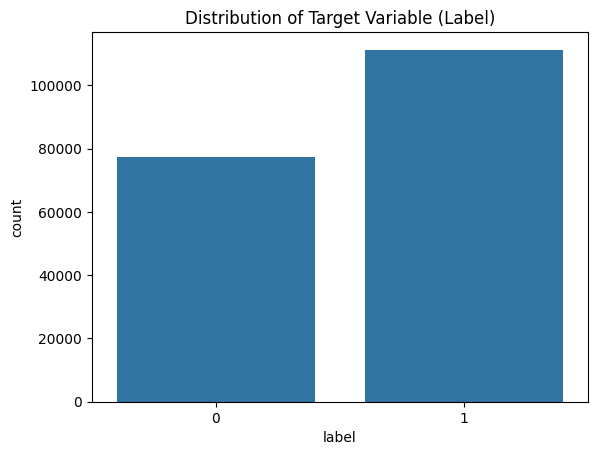

In [22]:
# Visualizing the distribution of the target variable
sns.countplot(x='label', data=data)
plt.title('Distribution of Target Variable (Label)')
plt.show()

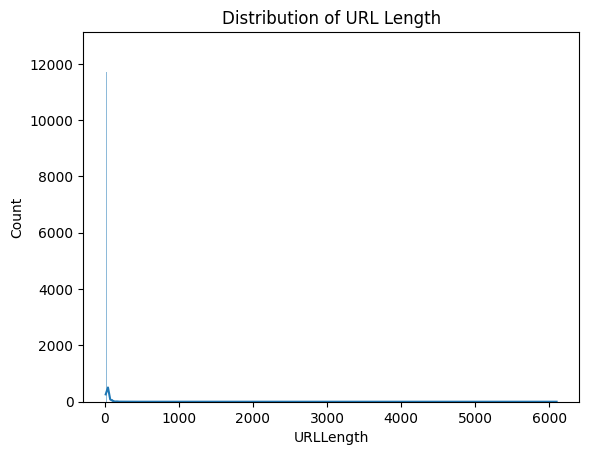

In [23]:
# Visualizing the distribution of URL length
sns.histplot(data['URLLength'], kde=True)
plt.title('Distribution of URL Length')
plt.show()

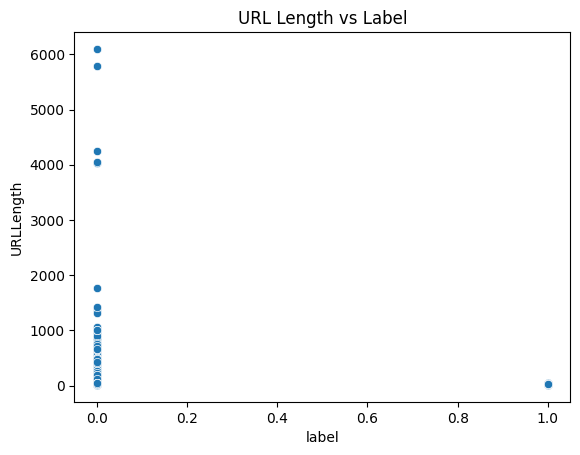

In [24]:
# Visualizing the relationship between URL length and Label
sns.scatterplot(x='label', y='URLLength', data=data)
plt.title('URL Length vs Label')
plt.show()

Graph shows that as URL length increases it is more likely to be a fraudalent site.

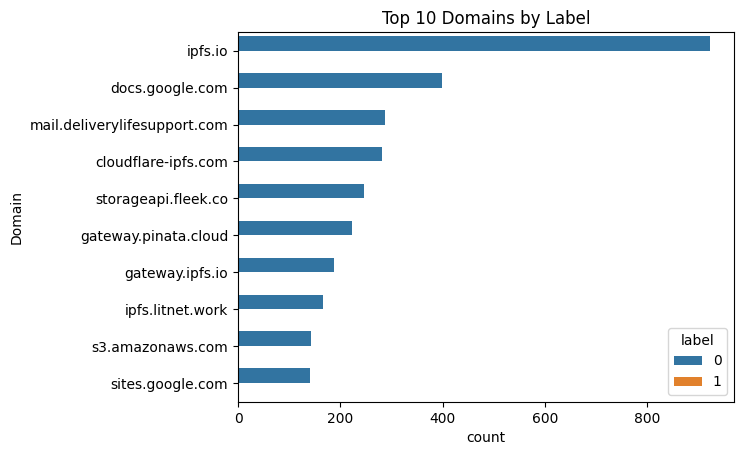

In [25]:
# Visualizing categorical features
sns.countplot(y='Domain', hue='label', data=data, order=data['Domain'].value_counts().iloc[:10].index)
plt.title('Top 10 Domains by Label')
plt.show()

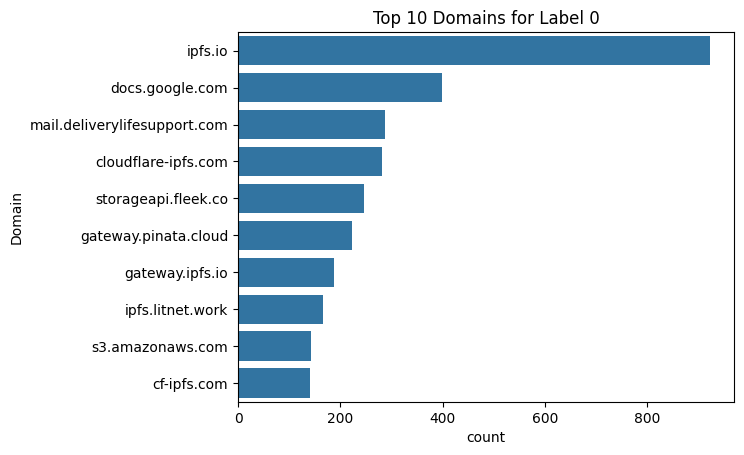

In [26]:
data_0 = data[data['label'] == 0]
data_1 = data[data['label'] == 1]
# For label 0
sns.countplot(y='Domain', data=data_0, order=data_0['Domain'].value_counts().iloc[:10].index)
plt.title('Top 10 Domains for Label 0')
plt.show()

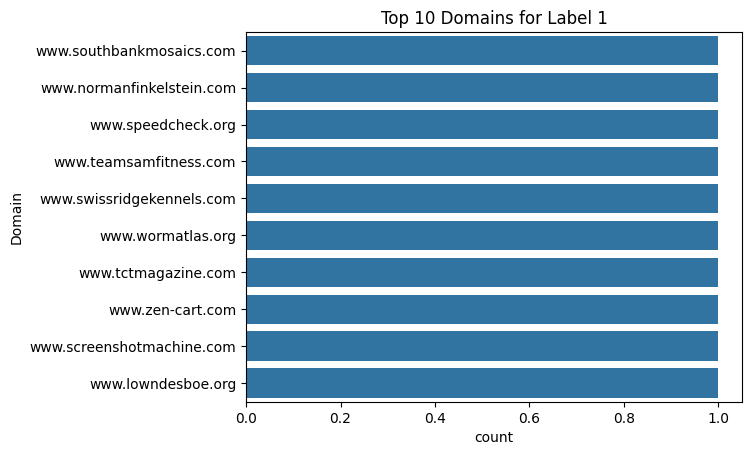

In [27]:
# For label 1
sns.countplot(y='Domain', data=data_1, order=data_1['Domain'].value_counts().iloc[:10].index)
plt.title('Top 10 Domains for Label 1')
plt.show()

**Conclusion:** legitimate domains are each unique and most phishing domain is ipfs.io

In [28]:
tld_counts = data['TLD'].value_counts()
print(tld_counts)

TLD
com      90396
org      15372
net       5613
uk        5219
app       4968
         ...  
sharp        1
100          1
faith        1
243          1
ne           1
Name: count, Length: 667, dtype: int64


In [29]:
# Group by TLD and label, then count occurrences
tld_label_counts = data.groupby(['TLD', 'label']).size().unstack(fill_value=0)

# Find TLD with most label 0
most_label_0_tld = tld_label_counts[0].idxmax()
print("TLD with most label 0:", most_label_0_tld)

# Find TLD with most label 1
most_label_1_tld = tld_label_counts[1].idxmax()
print("TLD with most label 1:", most_label_1_tld)

TLD with most label 0: com
TLD with most label 1: com


In [31]:
# Sort TLDs by label 0 count
sorted_label_0 = tld_label_counts[0].sort_values(ascending=False)

# Get the second most frequent TLD for label 0
second_most_label_0_tld = sorted_label_0.index[1]
print("Second most frequent TLD for label 0:", second_most_label_0_tld)

# Sort TLDs by label 1 count
sorted_label_1 = tld_label_counts[1].sort_values(ascending=False)

# Get the second most frequent TLD for label 1
second_most_label_1_tld = sorted_label_1.index[1]
print("Second most frequent TLD for label 1:", second_most_label_1_tld)


Second most frequent TLD for label 0: app
Second most frequent TLD for label 1: org


In [30]:
# Dropping columns that might not be useful
data.drop(['URL'], axis=1, inplace=True)
data.drop(['Title'], axis=1, inplace=True)
data.drop(['Domain'], axis=1, inplace=True)
data.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


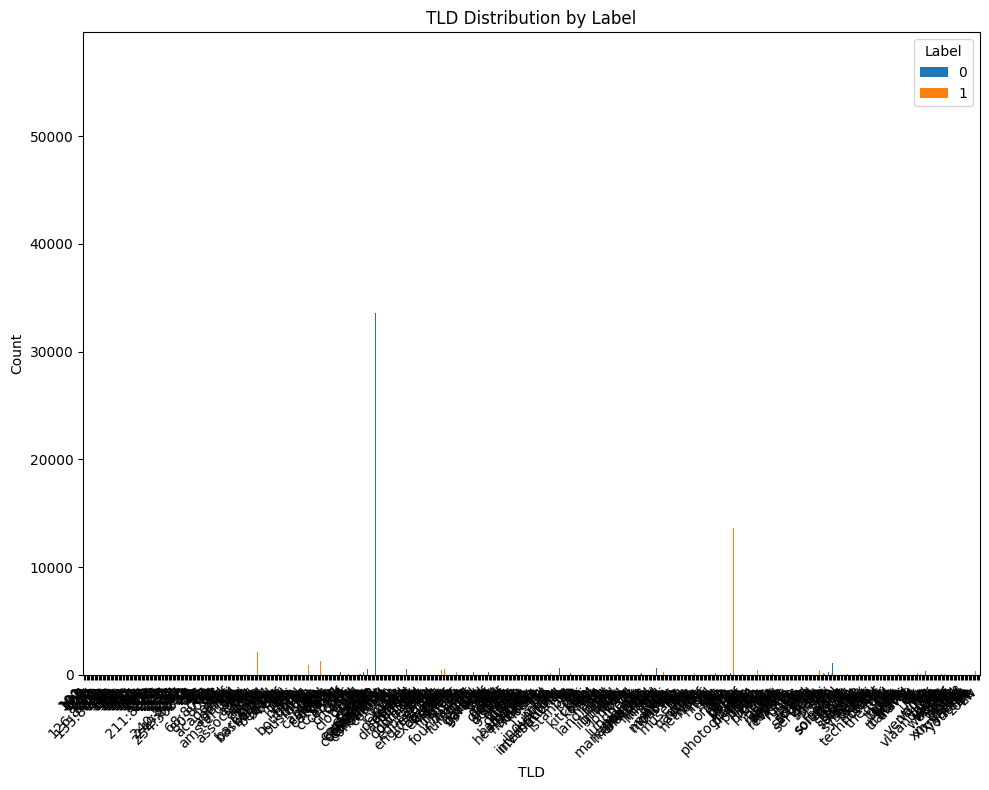

In [32]:
# Group by TLD and label, then count occurrences
tld_label_counts = data.groupby(['TLD', 'label']).size().unstack(fill_value=0)

# Plot the bar chart
tld_label_counts.plot(kind='bar', figsize=(10, 8))
plt.xlabel('TLD')
plt.ylabel('Count')
plt.title('TLD Distribution by Label')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

In [35]:
# Handling categorical features, one hot encoding (example: TLD)
data_onehot = pd.get_dummies(data, columns=['TLD'], drop_first=True)
data_onehot = data_onehot.astype(int)
data_onehot.head()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,TLD_xn--p1acf,TLD_xn--p1ai,TLD_xyz,TLD_yachts,TLD_ye,TLD_youtube,TLD_za,TLD_zm,TLD_zone,TLD_zw
0,31,24,0,100,1,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,23,16,0,100,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,29,22,0,100,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,26,19,0,100,1,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,26,0,100,1,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


**We are getting 717 columns after one hot encoding of TLD. So we will keep it and not drop it. But Domains are mostly unique so we've to drop that.**

# Split Data into Training and Testing Sets

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = data_onehot.drop('label', axis=1)
y = data_onehot['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nShape of training data:", X_train_scaled.shape)
print("Shape of testing data:", X_test_scaled.shape)



Shape of training data: (150909, 716)
Shape of testing data: (37728, 716)


# Train a Classification Model

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15412
           1       1.00      1.00      1.00     22316

    accuracy                           1.00     37728
   macro avg       1.00      1.00      1.00     37728
weighted avg       1.00      1.00      1.00     37728



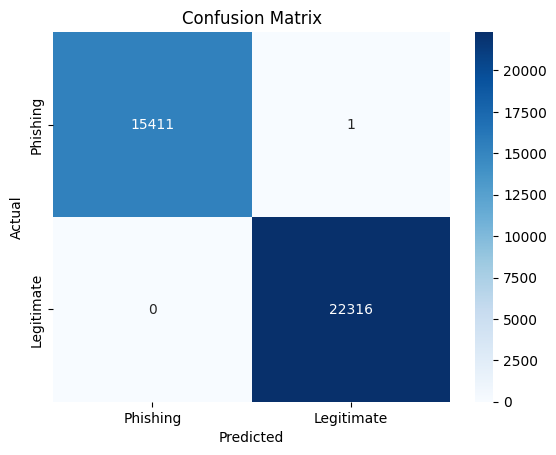

In [42]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Phishing', 'Legitimate'], yticklabels=['Phishing', 'Legitimate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Function to predict if a URL is safe or not

In [41]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Model Accuracy for Random Forest Classifier: {accuracy*100:.4f}")

Model Accuracy for Random Forest Classifier: 99.9973


In [49]:
def predict_url_safety(url_features):
    url_features_scaled = scaler.transform([url_features])
    prediction = rf_model.predict(url_features_scaled)
    return "Legitimate" if prediction[0] == 1 else "Phishing"

# Example usage
example_url_features = X.iloc[0].values  # Using the first row as an example
print("Prediction for URL:", predict_url_safety(example_url_features))

Prediction for URL: Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
